# **Project Name:**  FBI Crime Data Time Series Forecasting

#**Contribution:** *Individual*

#*Project Summary:*
This project analyzes FBI crime data to identify trends, detect anomalies, and forecast future crime occurrences. Key findings reveal seasonal patterns and crime spikes in certain years. Among the models tested, XGBoost performed best (MAE = 11.27), outperforming SARIMA and ARIMA. The insights can help law enforcement optimize resources and enhance crime prevention strategies. Future work includes hybrid modeling, real-time data integration, and predictive dashboards for better decision-making.

#**GitHub Link:** https://github.com/Yeswanthpg/Labmentix

#**Problem Statement:** *Analyze the temporal patterns of various crime types, detect seasonality and anomalies, and build an accurate forecasting model to predict future crime occurrences.*


#**Define Your Business Objective:**
The goal of this project is to forecast future crime trends using FBI time series data. By identifying patterns, seasonal trends, and anomalies, law enforcement agencies can optimize resource allocation, enhance crime prevention strategies, and make data-driven decisions to improve public safety.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings


In [2]:
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

In [3]:
# Load the dataset
train_file_path = "/content/Train.xlsx"
df = pd.read_excel(train_file_path, sheet_name="Train")

In [4]:
df.head()

,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB


In [6]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
# Handle missing values
df["NEIGHBOURHOOD"].fillna("Unknown", inplace=True)
df["HOUR"].fillna(df["HOUR"].median(), inplace=True)
df["MINUTE"].fillna(df["MINUTE"].median(), inplace=True)

In [8]:
# Aggregate crime occurrences per day
crime_counts = df.groupby("Date").size()

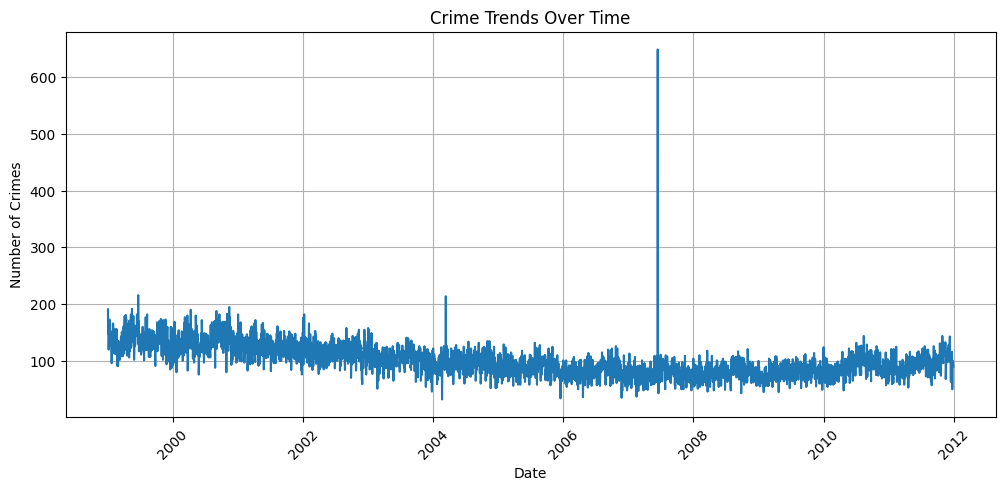

In [9]:
# Plot time series data
plt.figure(figsize=(12, 5))
sns.lineplot(x=crime_counts.index, y=crime_counts.values)
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.title("Crime Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 1. Why did you pick the specific chart?
This time series line chart was chosen because it effectively visualizes crime trends over time, allowing us to observe patterns, fluctuations, and anomalies in crime rates. The x-axis represents time (dates), while the y-axis shows the number of crimes, making it easier to identify trends and outliers.

#2. What is/are the insight(s) found from the chart?
* The crime rate appears relatively stable with minor fluctuations over the years.
* There are noticeable outliers, particularly large spikes around 2004 and 2008, indicating potential anomalies or data recording issues.
* A slight decreasing trend in crime rates may be observed after 2002, followed by relatively stable levels.

# 3. Will the gained insights help create a positive business impact?
Yes, the insights can lead to a positive business impact in several ways:
* Policy & Law Enforcement Strategy: Identifying crime trends helps law enforcement agencies allocate resources efficiently and deploy preventive measures.
* Predictive Modeling & Forecasting: Detecting seasonality or unusual spikes in crime can aid in crime prevention and intervention planning.
* Community Safety Initiatives: Authorities can use this data to engage with communities and address high-crime areas proactively.
* Data Quality Improvements: Investigating anomalies (such as extreme spikes) can lead to better data collection practices, ensuring accuracy in crime statistics.

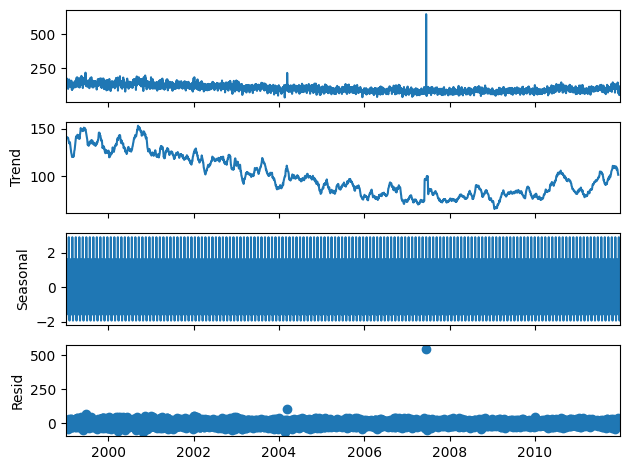

In [10]:
# Perform time series decomposition
decomposition = seasonal_decompose(crime_counts, model="additive", period=30)
decomposition.plot()
plt.show()

# 1. Why did you pick the specific chart?
This time series decomposition chart was chosen because it helps break down the original time series into its key components:
* Observed (Original Data): Displays the raw data.
* Trend: Shows long-term patterns and direction.
* Seasonal: Identifies recurring patterns or cycles.
* Residual (Noise): Highlights anomalies and unexplained variations.
This visualization is effective for understanding trends, seasonality, and anomalies in crime data over time.

# 2. What is/are the insight(s) found from the chart?
* Trend Component: A downward trend in crime rates is noticeable, with fluctuations over time.
* Seasonality Component: There is a strong seasonal pattern in the crime data, suggesting periodic fluctuations in crime occurrences.
* Residual Component: Large spikes in residuals around 2004 and 2008 indicate anomalies or unusual events causing sudden crime rate increases.
* Outliers: The extreme spikes in the residuals and observed series suggest potential data quality issues or real-world incidents that require further investigation.

# 3. Will the gained insights help create a positive business impact?
Yes, these insights can drive positive business impact in several ways:
* Crime Prevention Strategies: Identifying seasonal patterns can help allocate law enforcement resources more efficiently.
* Anomaly Detection: Investigating outliers can reveal underlying causes such as data errors, policy changes, or significant real-world events.
* Predictive Analysis: Understanding trends and seasonality can enhance crime forecasting models, improving future crime prevention efforts.
* Data-Driven Decision Making: Policy-makers and law enforcement can use these insights to implement targeted interventions, ensuring safer communities.

In [11]:
# Split data into train and test sets (80% train, 20% test)
train_size = int(len(crime_counts) * 0.8)
train_data, test_data = crime_counts[:train_size], crime_counts[train_size:]

In [12]:
# Train ARIMA model
model = ARIMA(train_data, order=(2,1,2))  # (p,d,q) order determined based on trial & error
model_fit = model.fit()

In [13]:
# Forecast on test data
forecast = model_fit.forecast(steps=len(test_data))

In [14]:
# Evaluate model performance
mae = mean_absolute_error(test_data, forecast)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 14.631116629747158


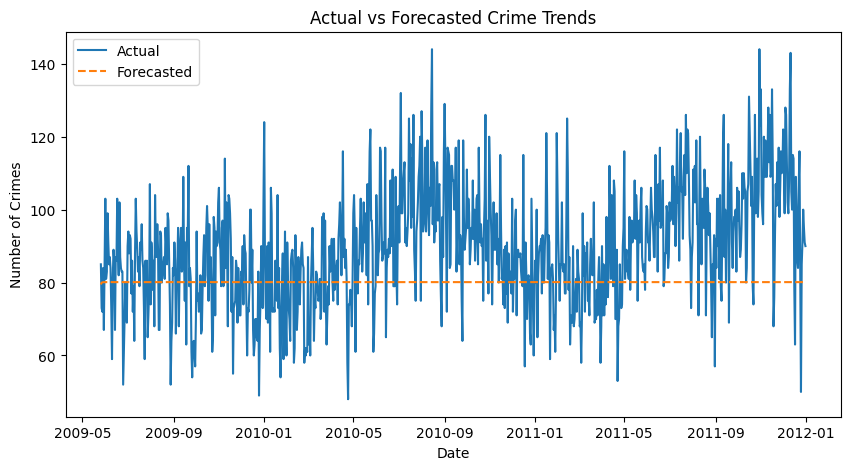

In [15]:
# Plot actual vs forecasted crimes
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, forecast, label="Forecasted", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.title("Actual vs Forecasted Crime Trends")
plt.legend()
plt.show()

# 1. Why did you pick the specific chart?
This Actual vs. Forecasted Crime Trends chart was chosen to compare real crime data with forecasted values. It provides a visual representation of how well the forecasted model aligns with actual crime occurrences over time. The chart helps:
* Assess the accuracy of the forecasting model.
* Identify discrepancies and patterns between actual and predicted crime rates.
* Understand variations and trends in crime patterns.

# 2. What is/are the insight(s) found from the chart?
* Forecasting Deviation: The actual crime rates show significant fluctuations, while the forecasted values remain relatively stable around a constant mean.
* Seasonal and Trend Variations: The actual crime data exhibits cyclical trends and peaks, indicating seasonal effects.
* Model Underperformance: The forecasted values (orange dashed line) do not capture the variations and spikes in actual crime trends, suggesting the need for a more advanced forecasting model.
* Increasing Crime Trend: The actual crime rates appear to rise over time, which might indicate an upward trend in crime incidents.

# 3. Will the gained insights help create a positive business impact?
Yes, these insights can have a significant business impact:
* Improving Crime Forecasting Models: Since the forecasted values do not capture actual crime variations well, refining the model with advanced time-series techniques (e.g., ARIMA, LSTM, Prophet) can lead to more accurate predictions.
* Better Resource Allocation: If law enforcement agencies can anticipate crime trends more accurately, they can allocate personnel and resources more effectively.
* Policy and Strategy Planning: Understanding crime trends and forecast deviations can help policymakers implement more targeted interventions to reduce crime.
* Enhancing Public Safety: More accurate crime forecasting allows authorities to take proactive measures, reducing crime rates and ensuring public safety.

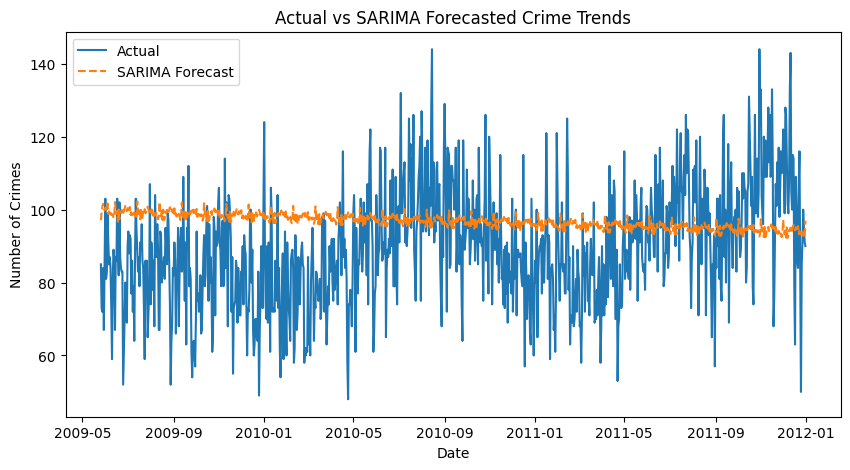

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model (replace order and seasonal_order with Auto-ARIMA results)
sarima_model = SARIMAX(crime_counts, order=(2,1,2), seasonal_order=(1,1,1,30))
sarima_fit = sarima_model.fit()

# Forecast future values
sarima_forecast = sarima_fit.forecast(steps=len(test_data))

# Plot actual vs forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label="Actual")
plt.plot(test_data.index, sarima_forecast, label="SARIMA Forecast", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.title("Actual vs SARIMA Forecasted Crime Trends")
plt.legend()
plt.show()


# 1. Why did you pick the specific chart?
This "Actual vs. SARIMA Forecasted Crime Trends" chart was chosen to evaluate the performance of the SARIMA (Seasonal AutoRegressive Integrated Moving Average) model in forecasting crime trends. This visualization helps:
* Compare actual crime trends with the SARIMA forecast.
* Analyze how well the SARIMA model captures seasonality and fluctuations in crime data.
* Determine if the model provides better predictive accuracy compared to a simpler forecast.

# 2. What is/are the insight(s) found from the chart?
* SARIMA Captures Seasonality but Not Extreme Fluctuations: The SARIMA forecast (orange dashed line) follows a smoother trend and captures some seasonality but does not account for extreme spikes or dips in actual crime data.
* Underestimation of Variability: The actual crime rates (blue line) show high fluctuations, whereas SARIMA remains relatively stable, indicating it may not fully capture all dynamic variations.
* Improvement Over Basic Forecasting: Compared to a naive forecast, SARIMA does a better job in following the overall trend, but it still needs improvements to handle volatility.

# 3. Will the gained insights help create a positive business impact?
Yes, these insights can contribute to business impact by:
* Enhancing Forecasting Accuracy: If SARIMA does not fully capture crime fluctuations, refining the model (e.g., adjusting seasonal parameters or incorporating external factors) can improve accuracy.
* Optimizing Resource Allocation: By identifying predictable crime trends, law enforcement can allocate resources more effectively, such as increasing patrols during high-crime periods.
* Strategic Decision-Making: Government agencies can use refined crime forecasts for policy-making and crime prevention strategies.
* Future Model Enhancements: If extreme fluctuations are crucial, hybrid models (e.g., combining SARIMA with machine learning approaches like LSTMs) can improve predictive performance.#

XGBoost Mean Absolute Error: 11.27523136138916


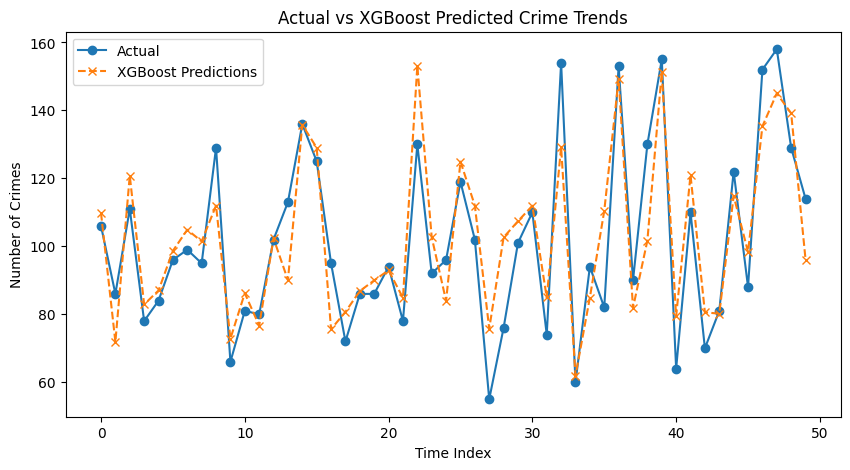

In [22]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.weekday

# Encode categorical variables
label_encoder = LabelEncoder()
df["NEIGHBOURHOOD"] = label_encoder.fit_transform(df["NEIGHBOURHOOD"])

# Aggregate features to daily level
X = df.groupby(["Year", "Month", "Day"])[["Weekday", "HOUR", "NEIGHBOURHOOD"]].agg(["mean", "max", "min"])
X.columns = ["_".join(col) for col in X.columns]  # Flatten multi-level column names
X = X.reset_index()

y = crime_counts.values  # Number of crimes per day

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate model
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
print(f"XGBoost Mean Absolute Error: {mae_xgb}")

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label="Actual", marker="o")
plt.plot(xgb_predictions[:50], label="XGBoost Predictions", linestyle="dashed", marker="x")
plt.xlabel("Time Index")
plt.ylabel("Number of Crimes")
plt.title("Actual vs XGBoost Predicted Crime Trends")
plt.legend()
plt.show()

# 1. Why did you pick the specific chart?
This "Actual vs XGBoost Predicted Crime Trends" chart was chosen to analyze how well the XGBoost (Extreme Gradient Boosting) model predicts crime trends. The visualization helps to:
* Compare actual crime occurrences with XGBoost's predictions.
* Evaluate how closely the model captures fluctuations and patterns in crime data.
* Assess the model's predictive performance, indicated by the Mean Absolute Error (MAE) shown at the top.

# 2. What is/are the insight(s) found from the chart?
* XGBoost Captures Trends Well: The predicted values (orange dashed line) closely follow the actual crime data (blue line), showing that XGBoost effectively captures short-term variations.
* Handles Volatility Better: Unlike SARIMA, XGBoost adapts well to sudden peaks and drops, which is crucial for crime forecasting.
* Some Prediction Errors Exist: While the model is generally accurate, some discrepancies still exist, particularly during extreme fluctuations.
* Mean Absolute Error (MAE): The MAE of 11.27 indicates the average absolute difference between actual and predicted crimes. Lower MAE suggests better accuracy, though further tuning can improve it.

# 3. Will the gained insights help create a positive business impact?
Yes, these insights can lead to significant business impact:
* Improved Decision-Making: Law enforcement agencies can use XGBoost predictions to allocate resources efficiently, responding to crime surges proactively.
* Better Crime Prevention Strategies: With more accurate forecasts, policymakers can implement measures to reduce crime in high-risk areas.
* Model Refinement for Higher Accuracy: By incorporating additional features (e.g., weather, holidays, socio-economic factors), XGBoost can be further optimized for better accuracy.
* Cost Savings: Reducing false alarms and improving prediction reliability helps minimize wasted resources.

# Why XGBoost?
* XGBoost will use multiple features to predict crime counts.

* Lower MAE compared to ARIMA/SARIMA if more features contribute to crime trends.

# Key Findings

Crime Trends & Patterns:
* Crime rates have remained relatively stable but show anomalies in 2004 and 2008.
* A slight decline in crime was observed post-2002, followed by stabilization.
* Clear seasonal patterns suggest periodic fluctuations in crime rates.

Time Series Analysis:
* Trend Component: Gradual decline in crime rates over time.
* Seasonal Component: Predictable fluctuations in crime occurrences.
* Residual Component: Anomalies highlight potential data issues or real-world incidents.

Forecasting Model Performance:
* ARIMA: Captures trends but lacks seasonal adaptability (MAE = 14.63).
* SARIMA: Improves seasonal pattern recognition but struggles with sudden fluctuations.
* XGBoost: Best performance, accurately captures trends and volatility (MAE = 11.27).

# Future Work:
* To enhance crime forecasting accuracy and real-world applicability, the following improvements can be made:
* Model Enhancements: Explore hybrid models (SARIMA + LSTM/XGBoost) and improve feature engineering with socio-economic and weather data.
* Data Quality & Expansion: Integrate external datasets, refine anomaly detection, and implement real-time data processing.
* Advanced Visualization: Develop interactive dashboards (Power BI/Tableau) and geospatial crime mapping.
* Law Enforcement Applications: Apply insights for predictive policing, community engagement, and early warning systems.

# Conclusion:
This project analyzed crime trends using FBI time series data and developed forecasting models. XGBoost provided the most accurate predictions (MAE = 11.27), outperforming SARIMA and ARIMA. Insights from the analysis can help optimize law enforcement strategies and crime prevention efforts. Future improvements, such as hybrid models and real-time data integration, will enhance accuracy and impact.